# Importing the neseccary dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import PolynomialRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics




# Data Collection and pre-processing

In [2]:
data = pd.read_csv('gld_price_data.csv')

In [3]:
# Diaplaying the top 5 elements of data
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Displaying the bottom 5 elements of data
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# Describing the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
# Displaying the shape of data
data.shape

(2290, 6)

In [7]:
# Since the description of data doesnot contains any null values as
# the no. of rows and no. of counts are equal in all the features

# Anyway checking for the null values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# Checking whole information of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# Dropping the date:
data.drop('Date',axis=1,inplace=True)

In [10]:
# Checking again for the info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


# Correlation

In [11]:
# Calling the function of correlation
correlation = data.corr()

<Axes: >

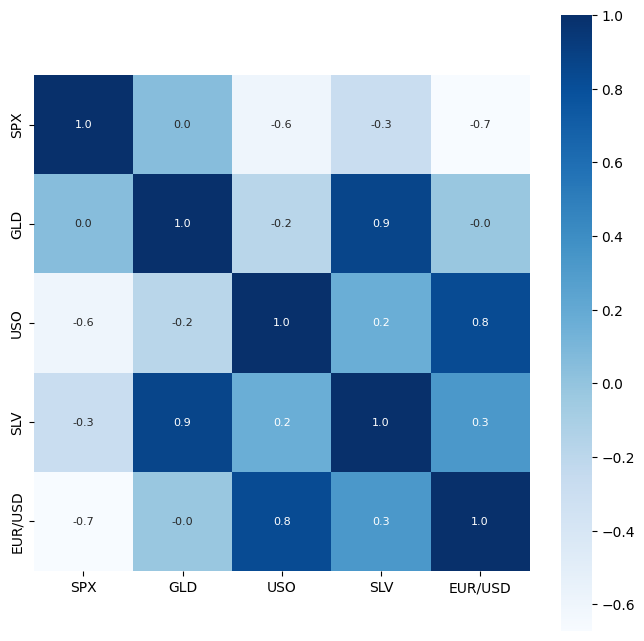

In [12]:
# Constructiong heat map for analysing the data
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')


In [13]:
# Displaying the correlation value of GLD
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

In [14]:
# We found that some are positively correlated and some are negatively. 
# Eg: The price of silver is highest positively correlated.
# Means as the price of silver increases, the gol also increases highly.

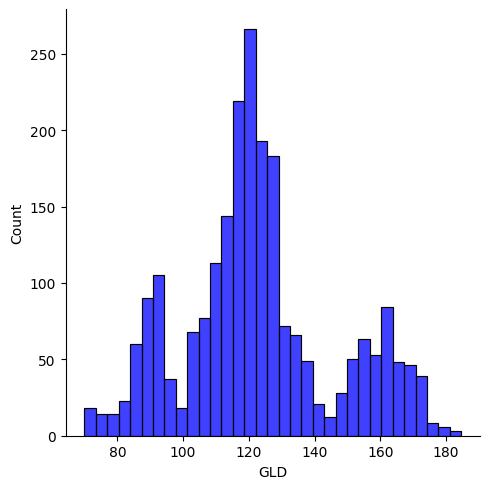

In [15]:
# Checking the distribution of gold
sns.displot(data['GLD'],color = 'Blue')

In [16]:
# We found that the distribution of gold price is normal or gaussian.

# Splitting the target and feature columns

In [17]:
X = data.drop(columns=['GLD'],axis=1)
Y = data['GLD']

In [18]:
print('The features are:')
print(X)
print()

print('The target label:')
print(Y)

The features are:
              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]

The target label:
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting the data as the train , test split

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [34]:
# Displaying the shapes after splitting
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


# Training of a model

In [35]:
# Using the Linear Regression Model
model1 = LinearRegression()
model1.fit(X_train,Y_train)
accuracy_1 = model1.score(X_train, Y_train) 
print('Training accuracy:',accuracy_1)



Training accuracy: 0.8771892526181604


In [36]:
# Checking the testing accuracy of Linear Regression
accuracy_test = model1.score(X_test, Y_test)
print('Testing Accuracy:',accuracy_test)


Testing Accuracy: 0.8975640982991402


In [37]:
# Using the Random Forest Regression Model and checking the training accuracy
# 
model2 = RandomForestRegressor(n_estimators=100)
model2.fit(X_train, Y_train)
print('Training Accuracy :',model2.score(X_train,Y_train))

Training Accuracy : 0.9985603978410611


In [24]:
print('Testing Accuracy:',model2.score(X_test,Y_test))

Testing Accuracy: 0.9905039490046088


In [25]:
print('YTrain',Y_train)
print('ytest',Y_test)

YTrain 1018    160.539993
1870    120.900002
118      94.440002
220      84.519997
2053    122.599998
           ...    
1638    112.839996
1095    162.020004
1130    152.619995
1294    119.459999
860     169.399994
Name: GLD, Length: 1832, dtype: float64
ytest 2178    122.320000
1271    129.899994
1268    126.980003
44       96.500000
2025    117.580002
           ...    
1872    126.680000
1075    167.179993
299      93.849998
306      96.230003
1132    154.339996
Name: GLD, Length: 458, dtype: float64


In [29]:
# Predict on the training and testing data
y_train_pred = model2.predict(X_train)  # It returns an array of predicted data points locating at the model
y_train_pred= model2.predict(X_test)   # It returns an array of predicted data points locating at the model

In [32]:
# print(y_train_pred)
# print('********')
# print(y_test_pred)

# Plotting the Actual and Predicted results


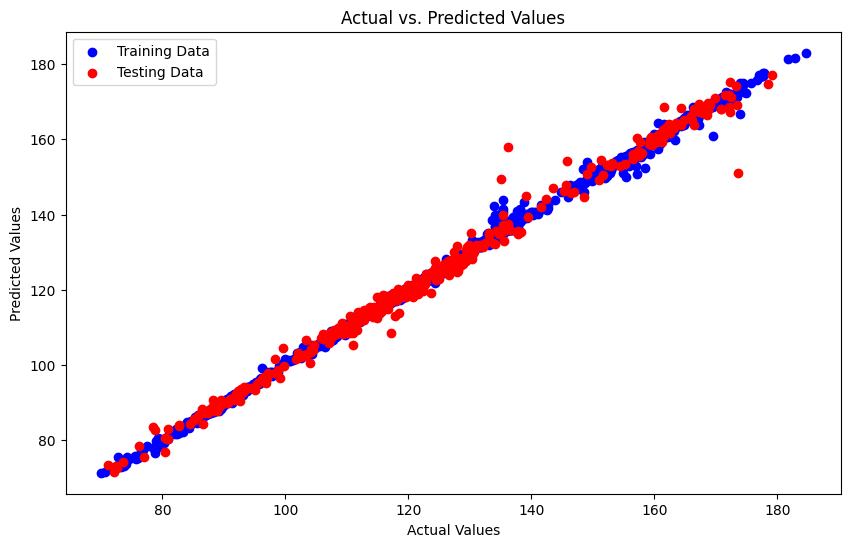

In [28]:



# Create scatter plots for training and testing data
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, y_train_pred, color='blue', label='Training Data')
plt.scatter(Y_test, y_test_pred, color='red', label='Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# Building a predictive model

In [46]:

input_data = (2725.78,14.4058,15.4542,1.182033)

In [47]:
# Converting the tuple values into numpy array
input_data = np.asarray(input_data)

In [48]:
print(input_data)

[2.725780e+03 1.440580e+01 1.545420e+01 1.182033e+00]


In [49]:
# Reshaping the data as we have a single sample
input_data = input_data.reshape(1,-1)

In [50]:
# Predicting the price of gold.
print(model2.predict(input_data))

[122.91487988]


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Here, the model have predicted the value of gold as 122.9148 to our input data.